# Logistic regression using `statsmodels`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/data/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
BANKNOTES_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

In [3]:
var_names = ['wavelet_var', 'wavelet_skew', 'wavelet_kurt', 'entropy', 'forged']

Read in the Banknote Authentication dataset.

In [4]:
banknotes = pd.read_csv(BANKNOTES_URL, header=None, names=var_names)

Explore data visually.

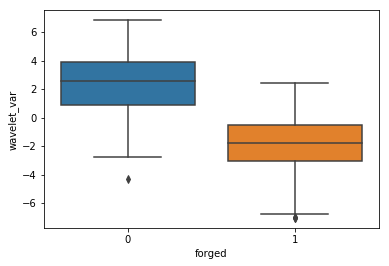

In [5]:
sns.boxplot(x='forged', y='wavelet_var', data=banknotes)

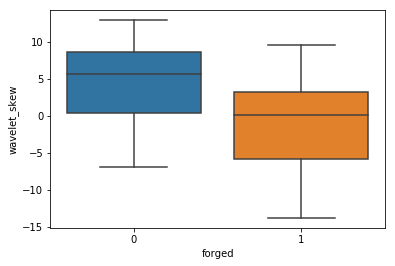

In [6]:
sns.boxplot(x='forged', y='wavelet_skew', data=banknotes)

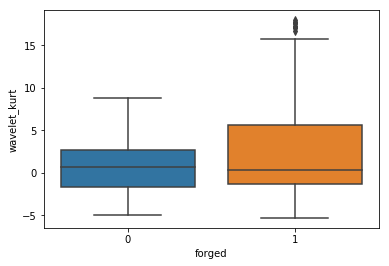

In [7]:
sns.boxplot(x='forged', y='wavelet_kurt', data=banknotes)

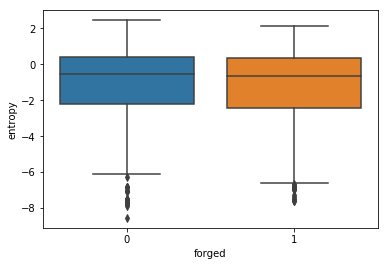

In [8]:
sns.boxplot(x='forged', y='entropy', data=banknotes)

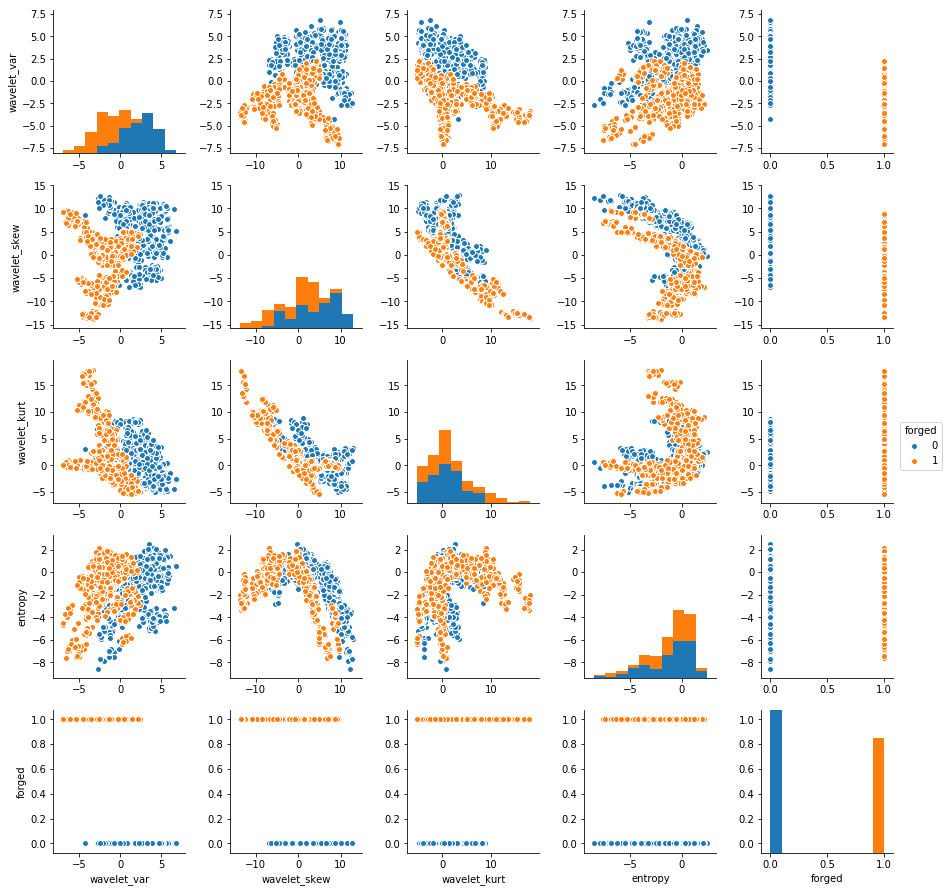

In [9]:
sns.pairplot(banknotes, hue='forged')

Build a logistic regression model including all predictors.

In [10]:
model_full = smf.glm(
    'forged ~ wavelet_var + wavelet_skew + wavelet_kurt + entropy',
    data=banknotes,
    family=sm.families.Binomial()
).fit()

In [11]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 forged   No. Observations:                 1372
Model:                            GLM   Df Residuals:                     1367
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -24.945
Date:                Sun, 03 Dec 2017   Deviance:                       49.891
Time:                        13:29:33   Pearson chi2:                     53.5
No. Iterations:                    13                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.3218      1.559      4.697      0.000       4.266      10.377
wavelet_var     -7.8593      1.738     -4.521      0.000     -11.267      -4.452
wavelet_skew    -4.1910      0.904     -4.635      0.000      -5.963      -2.419
wavelet_kurt    -5.2874      1.161     -4.553      0.000      -7.563      -3.011
entropy         -0.6053      0.331     -1.830      0.067      -1.254       0.043
================================================================================
"""

Drop predictors that are not statistically significant ($p > 0.05$).

In [12]:
model_vsk = smf.glm(
    'forged ~ wavelet_var + wavelet_skew + wavelet_kurt',
    data=banknotes,
    family=sm.families.Binomial()
).fit()

In [13]:
model_vsk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 forged   No. Observations:                 1372
Model:                            GLM   Df Residuals:                     1368
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -26.649
Date:                Sun, 03 Dec 2017   Deviance:                       53.299
Time:                        13:29:34   Pearson chi2:                     65.0
No. Iterations:                    12                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8850      1.384      4.975      0.000       4.173       9.597
wavelet_var     -6.7835      1.395     -4.863      0.000      -9.518      -4.049
wavelet_skew    -3.5067      0.693     -5.059      0.000      -4.865      -2.148
wavelet_kurt    -4.4642      0.901     -4.957      0.000      -6.229      -2.699
================================================================================
"""

Print out and interpret the odds ratios.

In [14]:
np.exp(model_vsk.params)

Intercept       977.474834
wavelet_var       0.001132
wavelet_skew      0.029996
wavelet_kurt      0.011514
dtype: float64

Plot the distribution of the fitted values.

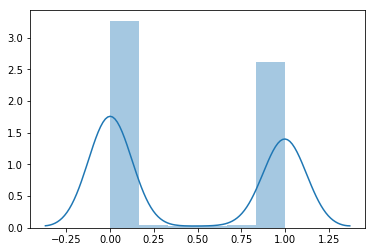

In [15]:
sns.distplot(model_vsk.fittedvalues)

Assuming a 50% cut-off value for the probability of being forged, compare the fitted values to the outcome.

*Hint*: use `pd.crosstab` to produce a two-by-two table.

In [16]:
pd.crosstab(model_vsk.fittedvalues > 0.5, banknotes.forged)

forged,0,1
row_0,,
False,757,4
True,5,606
